# (Dataset Exploration Title)
## by (Dalal AlAli)

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load Ford GoBike dataset file to my jupyter notebook
bike = pd.read_excel('2017-fordgobike-tripdata.xlsx')

In [3]:
bike.shape

(519700, 13)

In [4]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [5]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [7]:
# Drop the unneeded coulmns
bike.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [8]:
bike.head(60)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),30,San Francisco Caltrain (Townsend St at 4th St),1487,Customer
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,259,Addison St at Fourth St,3539,Customer
7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,284,Yerba Buena Center for the Arts (Howard St at ...,1503,Customer
8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),3125,Customer
9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),2543,Customer


In [9]:
# fixing the data types problems.
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike.end_time = pd.to_datetime(bike.end_time)

In [10]:
bike.start_station_id = bike.start_station_id.astype(str)
bike.end_station_id = bike.end_station_id.astype(str)
bike.bike_id = bike.bike_id.astype(str)
bike.user_type = bike.user_type.astype('category')

In [11]:
# extract start time month name
bike['start_time_month_name']=bike['start_time'].dt.strftime('%B')

In [12]:
# extract start time weekdays
bike['start_time_weekday']=bike['start_time'].dt.strftime('%a')

In [13]:
# extract start time day
bike['start_time_day']=bike['start_time'].dt.day.astype(int)

In [14]:
# extract start time hour
bike['start_time_hour']=bike['start_time'].dt.hour

In [15]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_month_name,start_time_weekday,start_time_day,start_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,December,Sun,31,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,December,Sun,31,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,December,Sun,31,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,December,Sun,31,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,December,Sun,31,14


### What is the structure of your dataset?

we have 519700 rows and 13 columns


### What is/are the main feature(s) of interest in your dataset?
duration_sec
start_time
user_type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
duration_sec will help me to get the average
start_time will help me to know the start time and extract other needed info
user_type will help me to know the user type if it's customer or subsciber
start_time_month_name will help me to know the moth of the trips

## Univariate Exploration

> In this section, investigate distributions of individual variables.

Does the weekends have way more trips than the weekdays ?

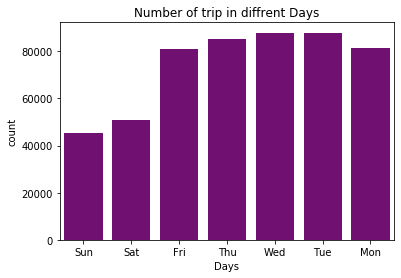

In [16]:
sb.countplot(data=bike, x='start_time_weekday',color='purple');
plt.xlabel('Days')
plt.title('Number of trip in diffrent Days');

From the figure i found that the weekdays have more trips than weekends.

What is the taken duration for the bike trip in seconds?

Text(0.5, 0, 'Duration in seconds')

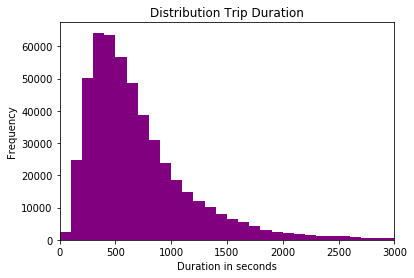

In [17]:
edges = np.arange(0, bike['duration_sec'].max()+100, 100)
plt.hist(data = bike, x = 'duration_sec', bins = edges,color='purple')
plt.xlim(0,3000)
plt.title('Distribution Trip Duration')
plt.ylabel('Frequency');
plt.xlabel('Duration in seconds')

From the figure i found that we have seen above that most of the duration were on 400 - 600 second.

What is the highest and lowest months in bike trips? 

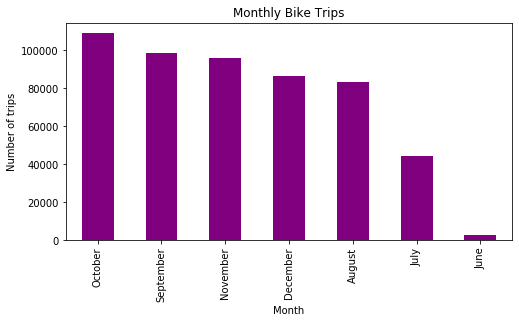

In [35]:
x=bike.start_time_month_name.value_counts().plot(kind='bar',figsize=(8,4),color='purple' ,title='Monthly Bike Trips');
x.set_xlabel("Month",fontsize=10);
x.set_ylabel("Number of trips",fontsize=10);

From the figure i found that October has the highest number of trips,on the other hand,june has the lowest number of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I used the realitionship between days and trips,realitionship between consumed time in seconds and trips and the realitionship between months and trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data is already tidy and correct and no need for making changes on it , but I added four columns which are start_time_month_name,	start_time_weekday, start_time_day, start_time_hour. 

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my
data.

what is the Relationship between duration and diffrent user type?

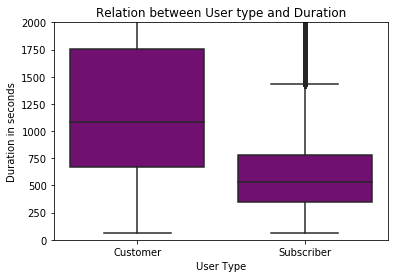

In [19]:
sb.boxplot(data = bike, x = 'user_type', y = 'duration_sec', color='purple') 
plt.ylim([0, 2000])
plt.title('Relation between User type and Duration')
plt.xlabel('User Type')
plt.ylabel('Duration in seconds')
plt.show()

From the figure i found that customers has longest duration,on the other hand,subscriber has low duration.

What is the relationship between user type and week days?

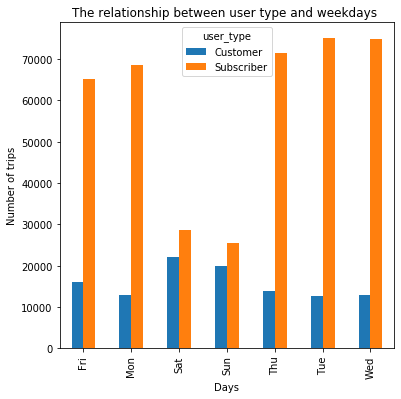

In [20]:
x = pd.crosstab(bike['start_time_weekday'], bike['user_type']).plot(kind='bar', stacked=False,title='The relationship between user type and weekdays ',figsize=(6,6));
x.set_xlabel("Days",fontsize=10);
x.set_ylabel("Number of trips",fontsize=10);

From the figure i found that on weekends the customer and subscribe heve too much lower bike trips as the weekdays.

What is the relationship between weather season and the trip duration ?

In [21]:
bike['duration_min']= bike['duration_sec'] / 60

In [22]:
# We categorize our 4 seasons categories
spring = bike.query('start_time_month_name in ["March" , "April" , "May"]' ).duration_min.mean ()
summer = bike.query('start_time_month_name in ["June" , "July" , "August"] ').duration_min.mean()
fall = bike.query('start_time_month_name in ["September" , "October" , "November"] ').duration_min.mean()
winter = bike.query('start_time_month_name in ["December" , "January" , "February"]' ).duration_min.mean()


In [23]:
spring , summer , fall , winter

(nan, 22.387334107370705, 17.36293514611413, 15.540560903177072)

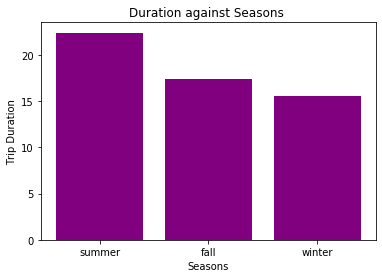

In [24]:
plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter],color="purple" )
plt.title('Duration against Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

From the figure i found that summer has the longest trip duration.The surprising factor here is the observation that 'spring' had the no trip duration in 2017. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I have seen from the firt realitionship which was  between duration and diffrent user type that customers has longest duration,on the other hand,subscriber has low duration.
I have seen from the Second realitionship which was  between between user type and week days that on weekends the customer and subscribe heve too much lower bike trips as the weekdays.
I have seen from the third realitionship which was  between weather season and the trip duration  that summer has the longest trip duration.The surprising factor here is the observation that 'spring' had the no trip duration in 2017.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I would say that The relationship between weather season and the trip duration impressed me because there was no trip in spring 2017.

## Multivariate Exploration

here i create plots of three or more variables to investigate my data even
further.

What is the realitionship between trip duration and months for each user type.

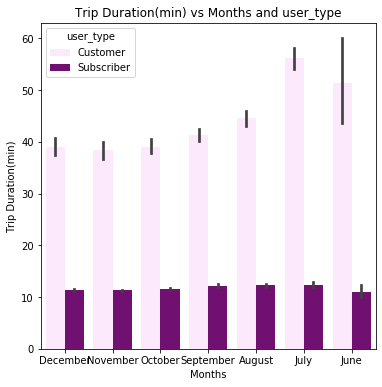

In [26]:
plt.figure(figsize = [6,6]);
x = sb.barplot(data=bike,x='start_time_month_name',y='duration_min',hue='user_type' ,color='purple');
plt.xlabel('Months');
plt.ylabel('Trip Duration(min)');
plt.title('Trip Duration(min) vs Months and user_type');

From the figure i found that customers has longest durations at all months,on the other hand,subscriber has low duration at all months.

What is the realitionship between the 5 stations by period of the day in both user_type?

In [34]:
import warnings
warnings.simplefilter("ignore")
#here i will extact the time period by split day hours by period
bike['start_hour'] = bike['start_time'].apply(lambda time: time.hour)
bike['period_day'] = 'morning'
bike['period_day'][(bike['start_hour'] >= 12) & (bike['start_hour'] <= 17)] = 'afternoon'
bike['period_day'][(bike['start_hour'] >= 18) & (bike['start_hour'] <= 23)] = 'night'

In [28]:
#from here i will find the top 5  high traffics locations as end stations then i will save them at bikes_top_five
print(len(bike['end_station_name'].value_counts()))
bike['end_station_name'].value_counts()

272


San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Empire St at 1st St                                              2
Ellsworth St at Russell St                                       2
Name: end_station_name, Length: 272, dtype: int64

In [29]:
# Subset the dataset by keep only top five locations with high traffics at bikes_top_five
location = ['San Francisco Caltrain (Townsend St at 4th St)','San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Montgomery St BART Station (Market St at 2nd St)']
bikes_top_five = bike.loc[bike['start_station_name'].isin(location)]

In [30]:
customer = bikes_top_five.query('user_type == "Customer"')

In [31]:
subscriber = bikes_top_five.query('user_type == "Subscriber"')


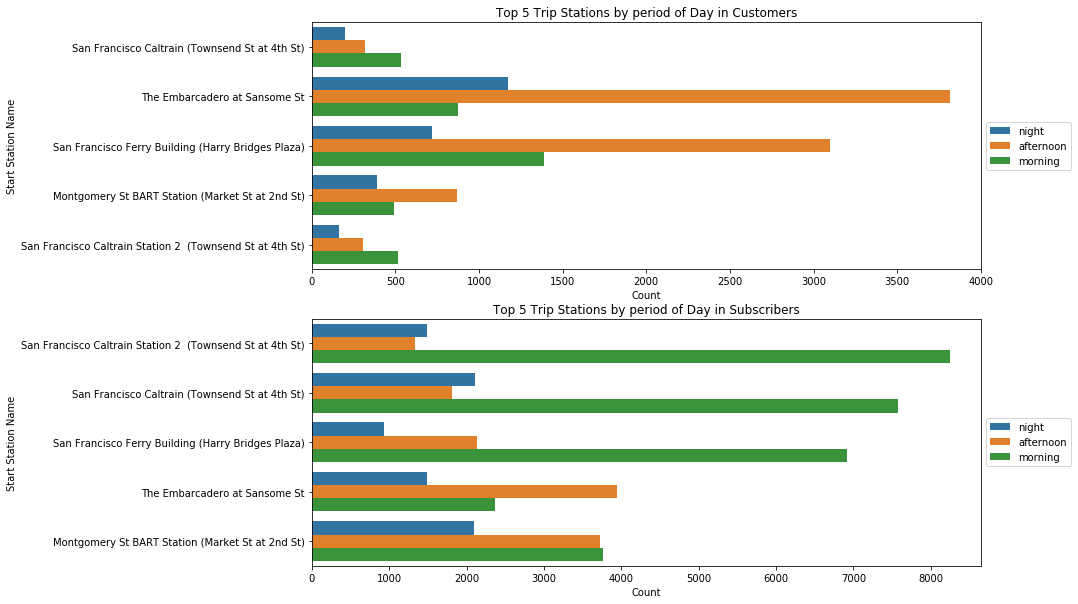

In [32]:
import seaborn as sns
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=customer, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by period of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=subscriber, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by period of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

From the figure i found that most of the trips were in the morning then in the afternoon finally,at morning.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
the realitionship between trip duration and months for each user type and the realitionship between the 5 stations by period of the day in both user_type.

### Were there any interesting or surprising interactions between features?
customers has longest durations at all months